# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = soup(browser.html, 'html.parser')

In [5]:
table = soup.find('table')

# Extract data from the table
mars_data = []
rows = table.find_all('tr')

for row in rows[1:]:
    cells = row.find_all('td')
    table_data = [cell.text for cell in cells]
    mars_data.append(table_data)

# Print the scraped data
for table_data in mars_data:
    print(table_data)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Hereâ€™s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
mars_list = []

# Loop through the scraped data
for table_data in mars_data:
    # Create a dictionary to store the row values
    mars_dict = {}
    
    # Extract individual values from the row data
    # and assign them to respective keys in the dictionary
    mars_dict['id'] = table_data[0]
    mars_dict['terrestrial_date'] = table_data[1]
    mars_dict['sol'] = table_data[2]
    mars_dict['ls'] = table_data[3]
    mars_dict['month'] = table_data[4]
    mars_dict['min_temp'] = table_data[5]
    mars_dict['pressure'] = table_data[6]
    
    # Add the row dictionary to the list of rows
    mars_list.append(mars_dict)

# Print the list of rows
for row in mars_list:
    print(row)

{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Define the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame
mars_df = pd.DataFrame(mars_list, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

In [9]:
#read_html method for fun and to check the for loop...
for_fun_df = pd.read_html(url)
for_fun_df[0].head()


id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
#Change data types for data analysis

mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64[ns]')
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months exist on Mars?
num_months = len(mars_df['month'].unique())
print("Number of months on Mars:", num_months)

Number of months on Mars: 12


In [14]:
# 2. How many Martian days' worth of data are there?
num_sol = mars_df['sol'].nunique()
print("Number of Martian Days on Mars:", num_sol)

Number of Martian Days on Mars: 1867


In [15]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_df.groupby('month')['min_temp'].mean()
print("Average Low Temperature by Month:")
print(avg_low_temp)

Average Low Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


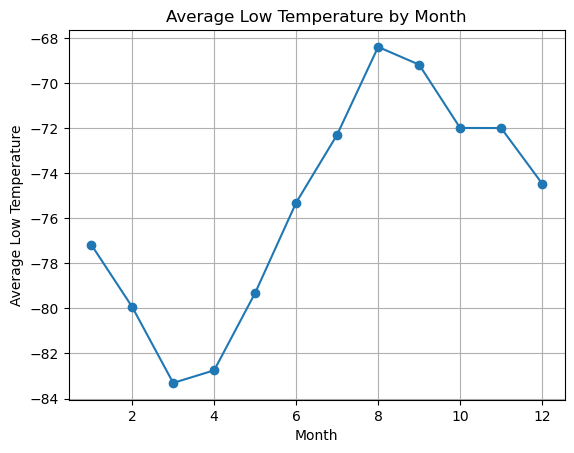

In [16]:
# Plot the average temperature by month
plt.plot(avg_low_temp, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month')
plt.grid(True)

#save the plot to the 'Images' folder
plt.savefig('Images/average_temperature_by_month.png')
#show the plot
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location
sorted_temp = avg_low_temp.sort_values()

# Get the coldest month
coldest_month = sorted_temp.index[0]

# Get the hottest month
hottest_month = sorted_temp.index[-1]

print("Coldest Month:", coldest_month)
print("Hottest Month:", hottest_month)

Coldest Month: 3
Hottest Month: 8


In [18]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
print("Average Pressure by Month:")
print(avg_pressure)

Average Pressure by Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


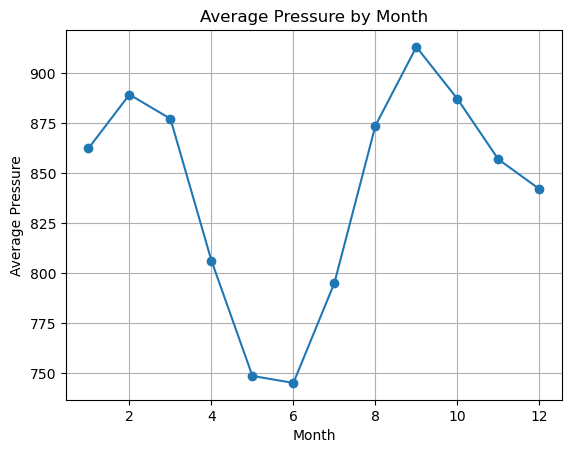

In [19]:
# Plot the average pressure by month
plt.plot(avg_pressure, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.grid(True)

#save the plot
plt.savefig('Images/average_pressure_by_month.png')
#show the plot
plt.show()

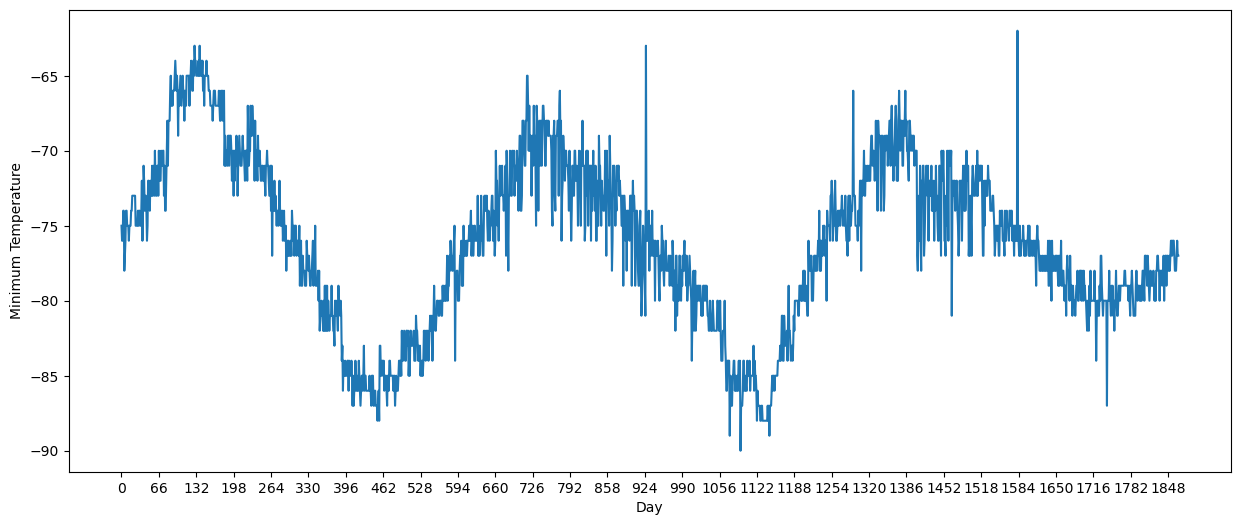

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#count the days
num_days = len(mars_df)

#set variables for plot
y = mars_df['min_temp']
x = range(num_days)

plt.figure(figsize=(15, 6))

# Plot the daily minimum temperature
plt.plot(x, y)

# Customize the x-axis ticks and labels
plt.xlabel('Day')
plt.ylabel('Minimum Temperature')

# Adjust the number and spacing of ticks
num_ticks = 28   
step = num_days // num_ticks
ticks = range(0, num_days, step)
plt.xticks(ticks)

# Show the plot
plt.show()
#Visually estimate the result by plotting the daily minimum temperature.

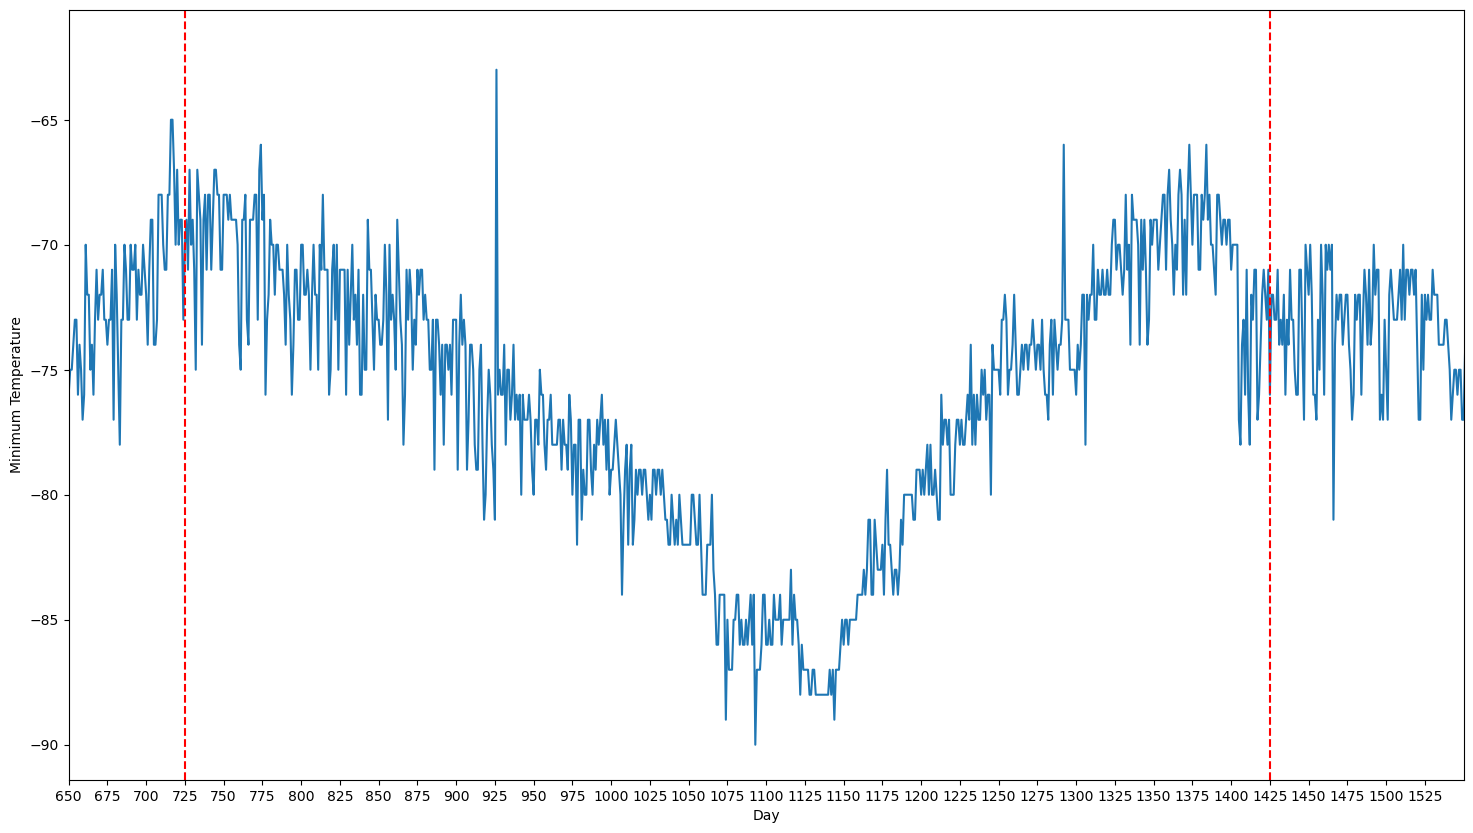

In [21]:
#focus on peak to peak to estimate number of days in a sol.
plt.figure(figsize=(18, 10))
plt.plot(x, y)
plt.xlim(650, 1550)

# Customize the x-axis ticks and labels
plt.xlabel('Day')
plt.ylabel('Minimum Temperature')
plt.xticks(range(650, 1550, 25))

#draw vertical lines indicated by the provided analysis
plt.axvline(x=725, color='red', linestyle='--')
plt.axvline(x=1425, color='red', linestyle='--')

#save the plot
plt.savefig('Images/min_temp_peak_plot.png')

# Show the plot
plt.show()



In [23]:
# Set up at list for the dates,
#set two dfs one for the dates and one for the months
#set up a boolean to track if month 7 has been found

my_dates = []
month_df = mars_df['month']
earth_date_df = mars_df['terrestrial_date']
month_7 = False  

#use the zip function to interate through both dfs simultaneously and append the dates with the .
for month, earth_date in zip(month_df, earth_date_df):
    if month == 7:
    #append the my_dates df when finding the first instance of the month 7
        if not month_7:
            my_dates.append(earth_date)
            month_7 = True
   
    # Reset when moving to a different month 
    elif month_7:  
        month_7 = False

print(my_dates)

#https://www.w3schools.com/python/ref_func_zip.asp

[Timestamp('2012-09-30 00:00:00'), Timestamp('2014-08-18 00:00:00'), Timestamp('2016-07-12 00:00:00')]


In [25]:
#subtract the first date from the second date to find the total numbers of earth days 
#between the first day of month 7 over a martian year

delta = (my_dates[1] - my_dates[0]).days

print("Number of days between the first and second date:", delta)

Number of days between the first and second date: 687


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=True)

In [27]:
browser.quit()